# Zomato Delivery Data Exploration

Comprehensive exploratory analysis of the cleaned delivery dataset. Each visual saves a copy to `../assets/plots/` for quick sharing.

In [22]:
# --- Set up analysis context -------------------------------------------------
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure seaborn/matplotlib defaults for consistent styling.
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Define canonical input/output locations used throughout this notebook.
raw_data_path = Path('../data/raw/zomato_dataset.csv')
data_path = Path('../data/processed/zomato_deliveries_clean.csv')
assets_dir = Path('../assets/plots')
CITY_REMAP = {'Metropolitian': 'Metropolitan'}
assets_dir.mkdir(parents=True, exist_ok=True)
print(f'Raw data source: {raw_data_path.resolve()}')
print(f'Clean data source: {data_path.resolve()}')
print(f'Plot exports will save under: {assets_dir.resolve()}')

Raw data source: /Users/xiaohuan/develop/is5740-datapre/data/raw/zomato_dataset.csv
Clean data source: /Users/xiaohuan/develop/is5740-datapre/data/processed/zomato_deliveries_clean.csv
Plot exports will save under: /Users/xiaohuan/develop/is5740-datapre/assets/plots


In [23]:
# --- Load the curated dataset --------------------------------------------------
raw_df = pd.read_csv(raw_data_path)
print(f'Raw shape: {raw_df.shape}')

df = pd.read_csv(data_path)
print(f'Clean shape: {df.shape}')

df.head()

Raw shape: (45584, 20)
Clean shape: (45584, 27)


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Festival,City,Time_taken (min),Time_Orderd_clean,Time_Orderd_minutes,Time_Order_picked_clean,Time_Order_picked_minutes,Order_Date_clean,order_to_pick_minutes,pickup_to_delivery_minutes
0,0xceea,LUDHRES18DEL02,33.0,4.9,30.890184,75.829615,30.910184,75.849615,11-02-2022,08:10,...,No,Urban,12.0,08:10,490.0,08:15,495,2022-02-11,5.0,7.0
1,0xcb30,AGRRES08DEL01,22.0,4.3,27.160934,78.044095,27.170934,78.054095,11-02-2022,08:10,...,No,Urban,27.0,08:10,490.0,08:20,500,2022-02-11,10.0,17.0
2,0xc3ff,ALHRES20DEL01,32.0,4.3,25.454697,81.834492,25.464697,81.844492,11-02-2022,08:10,...,No,Metropolitan,34.0,08:10,490.0,08:20,500,2022-02-11,10.0,24.0
3,0xd8c5,KOCRES12DEL02,36.0,4.8,9.988483,76.295211,10.008483,76.315211,11-02-2022,08:15,...,No,Urban,11.0,08:15,495.0,08:20,500,2022-02-11,5.0,6.0
4,0xcc98,AURGRES02DEL01,28.0,4.9,18.494806,76.324383,0.010000,0.010000,11-02-2022,08:15,...,No,Urban,14.0,08:15,495.0,08:25,505,2022-02-11,10.0,4.0


In [24]:
# --- Quick null audit for engineered timing fields ----------------------------
key_columns = ['Time_Orderd_clean', 'Time_Order_picked_clean', 'Order_Date_clean',
               'order_to_pick_minutes', 'pickup_to_delivery_minutes']
null_summary = df[key_columns].isna().sum().to_frame(name='missing_values')
null_summary

,missing_values
Time_Orderd_clean,0
Time_Order_picked_clean,0
Order_Date_clean,0
order_to_pick_minutes,0
pickup_to_delivery_minutes,0


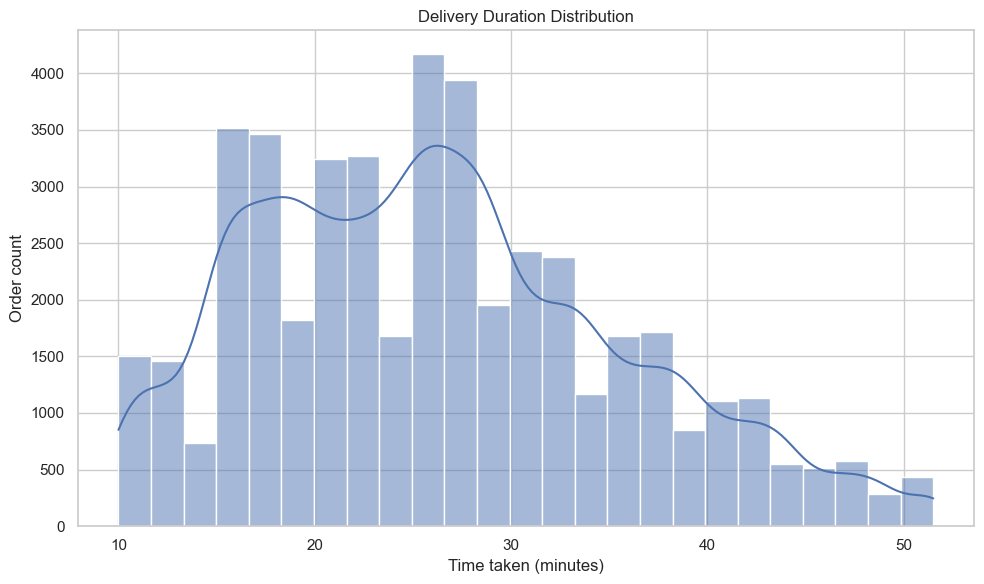

Saved histogram to delivery_duration_hist.png


In [25]:
# --- Delivery duration distribution --------------------------------------------
fig, ax = plt.subplots()
sns.histplot(df['Time_taken (min)'], bins=25, kde=True, ax=ax)
ax.set_title('Delivery Duration Distribution')
ax.set_xlabel('Time taken (minutes)')
ax.set_ylabel('Order count')
fig.tight_layout()
fig.savefig(assets_dir / 'delivery_duration_hist.png', dpi=150)
plt.show()
plt.close(fig)
print('Saved histogram to delivery_duration_hist.png')

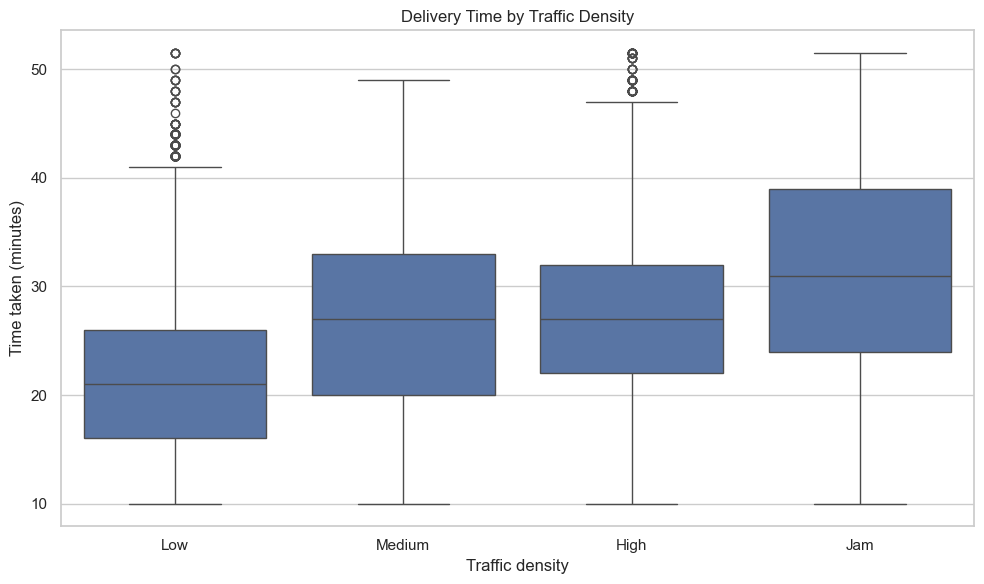

Saved boxplot to delivery_time_by_traffic.png


In [26]:
# --- Delivery time vs traffic density -----------------------------------------
fig, ax = plt.subplots()
traffic_order = ['Low', 'Medium', 'High', 'Jam']
sns.boxplot(data=df, x='Road_traffic_density', y='Time_taken (min)',
            order=traffic_order, ax=ax)
ax.set_title('Delivery Time by Traffic Density')
ax.set_xlabel('Traffic density')
ax.set_ylabel('Time taken (minutes)')
fig.tight_layout()
fig.savefig(assets_dir / 'delivery_time_by_traffic.png', dpi=150)
plt.show()
plt.close(fig)
print('Saved boxplot to delivery_time_by_traffic.png')

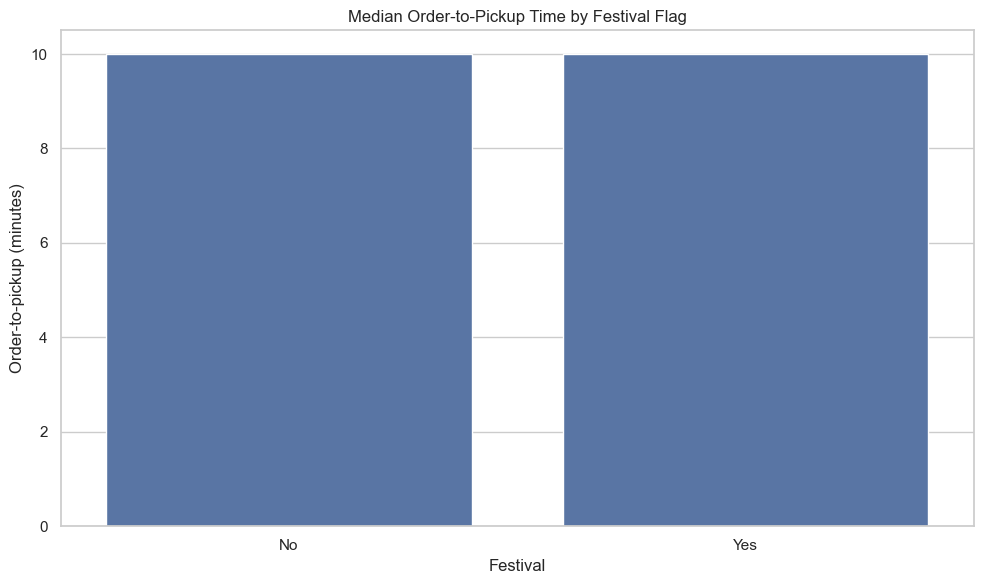

Saved bar chart to order_to_pick_by_festival.png


In [27]:
# --- Festival impact on order-to-pickup interval ------------------------------
fig, ax = plt.subplots()
festival_data = df.dropna(subset=['order_to_pick_minutes', 'Festival'])
sns.barplot(data=festival_data, x='Festival', y='order_to_pick_minutes',
            estimator='median', ax=ax)
ax.set_title('Median Order-to-Pickup Time by Festival Flag')
ax.set_xlabel('Festival')
ax.set_ylabel('Order-to-pickup (minutes)')
fig.tight_layout()
fig.savefig(assets_dir / 'order_to_pick_by_festival.png', dpi=150)
plt.show()
plt.close(fig)
print('Saved bar chart to order_to_pick_by_festival.png')

/var/folders/nb/kvkbxc8d33j0vfrxc19w1zvh0000gn/T/ipykernel_28012/2824403167.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_summary, x='City', y='share_missing_order_time', ax=ax, palette='Blues_d')


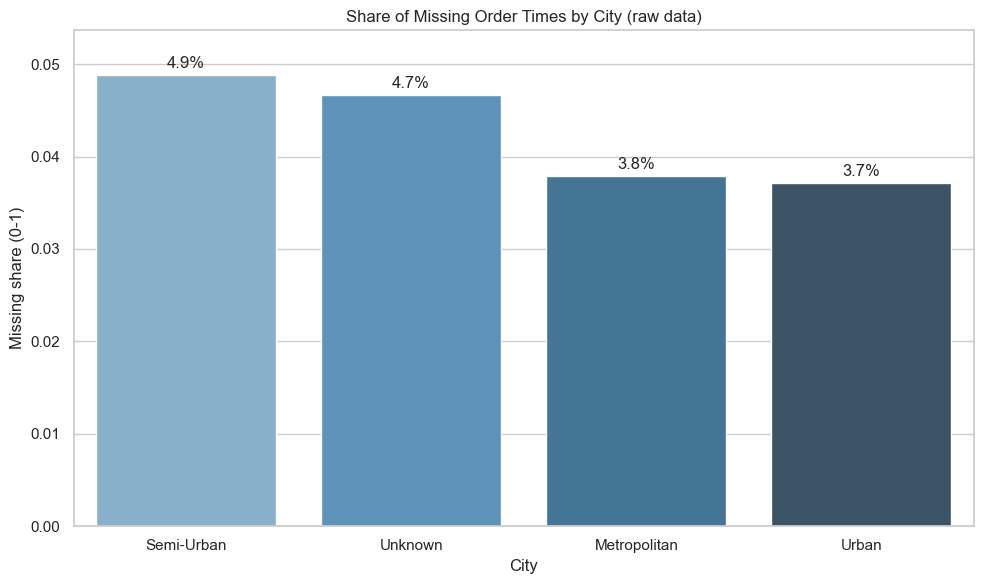

Saved bar chart to missing_order_time_by_city.png (raw dataset)


In [28]:
# --- Missing order time share by city -----------------------------------------
raw_city = raw_df.copy()
raw_city['City'] = (
    raw_city['City']
    .replace(CITY_REMAP)
    .fillna('Unknown')
    .astype(str)
    .str.strip()
)
raw_city['is_missing_order_time'] = raw_city['Time_Orderd'].isna()
missing_tokens = {'', 'nan', 'na', 'none'}
time_tokens = raw_city['Time_Orderd'].astype(str).str.strip().str.lower()
raw_city.loc[time_tokens.isin(missing_tokens), 'is_missing_order_time'] = True

city_summary = (
    raw_city.groupby('City', as_index=False)['is_missing_order_time']
    .mean()
    .rename(columns={'is_missing_order_time': 'share_missing_order_time'})
    .sort_values('share_missing_order_time', ascending=False)
)

fig, ax = plt.subplots()
sns.barplot(data=city_summary, x='City', y='share_missing_order_time', ax=ax, palette='Blues_d')
ax.set_title('Share of Missing Order Times by City (raw data)')
ax.set_xlabel('City')
ax.set_ylabel('Missing share (0-1)')
y_max = city_summary['share_missing_order_time'].max()
ax.set_ylim(0, max(0.05, y_max * 1.1))
if ax.containers:
    for container in ax.containers:
        percent_labels = [f'{val * 100:.1f}%' for val in container.datavalues]
        ax.bar_label(container, labels=percent_labels, padding=3)
fig.tight_layout()
fig.savefig(assets_dir / 'missing_order_time_by_city.png', dpi=150)
plt.show()
plt.close(fig)
print('Saved bar chart to missing_order_time_by_city.png (raw dataset)')

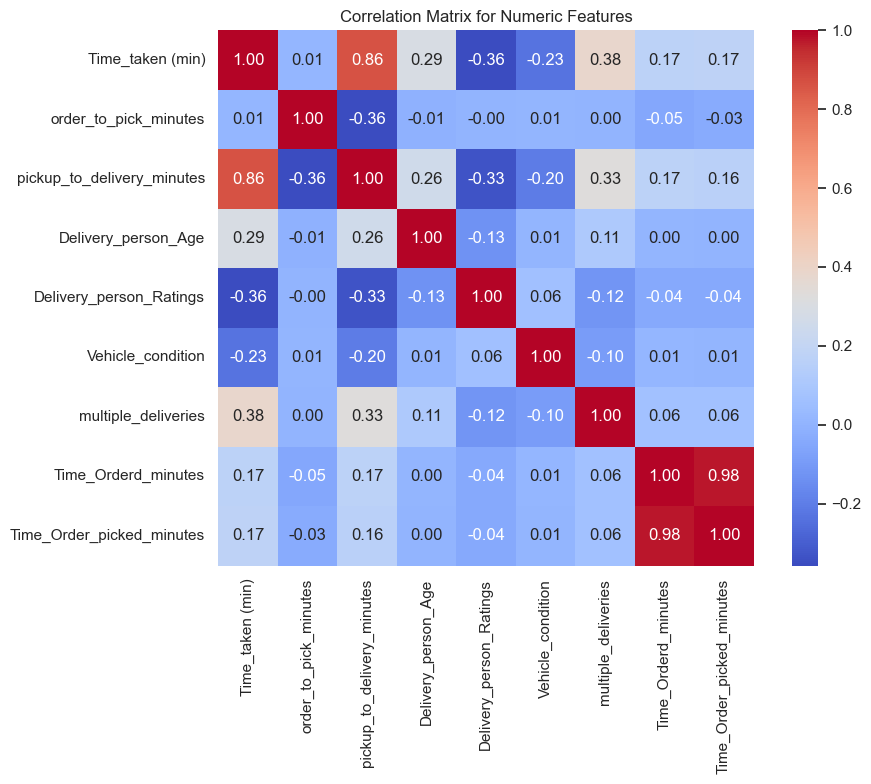

Saved heatmap to numeric_correlation_heatmap.png


In [29]:
# --- Correlation matrix for numeric features ----------------------------------
numeric_cols = ['Time_taken (min)', 'order_to_pick_minutes', 'pickup_to_delivery_minutes',
                'Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
                'multiple_deliveries', 'Time_Orderd_minutes', 'Time_Order_picked_minutes']

corr = df[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, ax=ax)
ax.set_title('Correlation Matrix for Numeric Features')
fig.tight_layout()
fig.savefig(assets_dir / 'numeric_correlation_heatmap.png', dpi=150)
plt.show()
plt.close(fig)
print('Saved heatmap to numeric_correlation_heatmap.png')

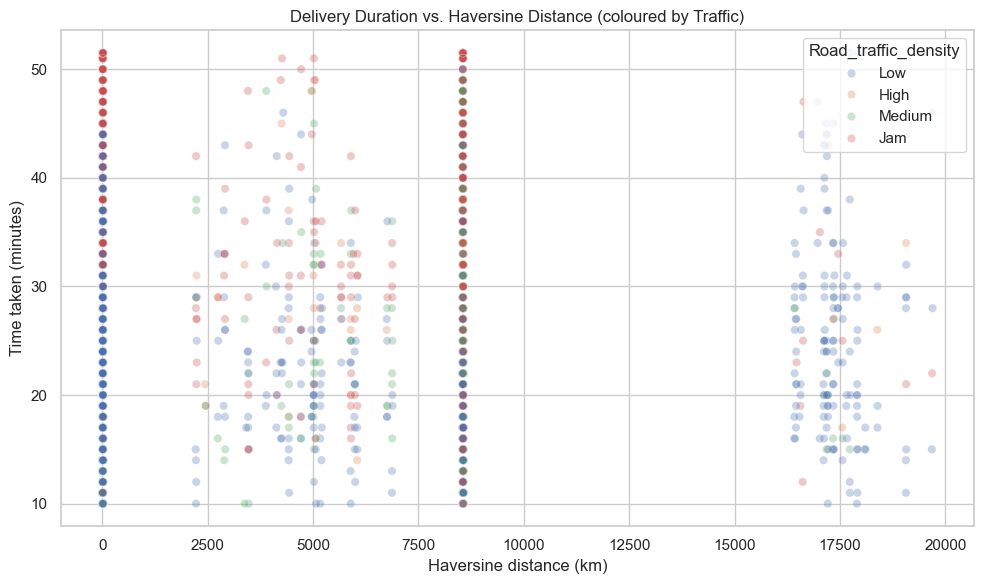

Saved scatter plot to delivery_time_vs_distance.png


In [30]:
# --- Distance proxy vs delivery time ------------------------------------------
radius_km = 6371
lat1 = np.radians(df['Restaurant_latitude'])
lon1 = np.radians(df['Restaurant_longitude'])
lat2 = np.radians(df['Delivery_location_latitude'])
lon2 = np.radians(df['Delivery_location_longitude'])

# Haversine distance approximation.
dlat = lat2 - lat1
dlon = lon2 - lon1
a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
df['haversine_km'] = radius_km * c

fig, ax = plt.subplots()
sns.scatterplot(data=df, x='haversine_km', y='Time_taken (min)',
                hue='Road_traffic_density', alpha=0.3, ax=ax)
ax.set_title('Delivery Duration vs. Haversine Distance (coloured by Traffic)')
ax.set_xlabel('Haversine distance (km)')
ax.set_ylabel('Time taken (minutes)')
fig.tight_layout()
fig.savefig(assets_dir / 'delivery_time_vs_distance.png', dpi=150)
plt.show()
plt.close(fig)
print('Saved scatter plot to delivery_time_vs_distance.png')

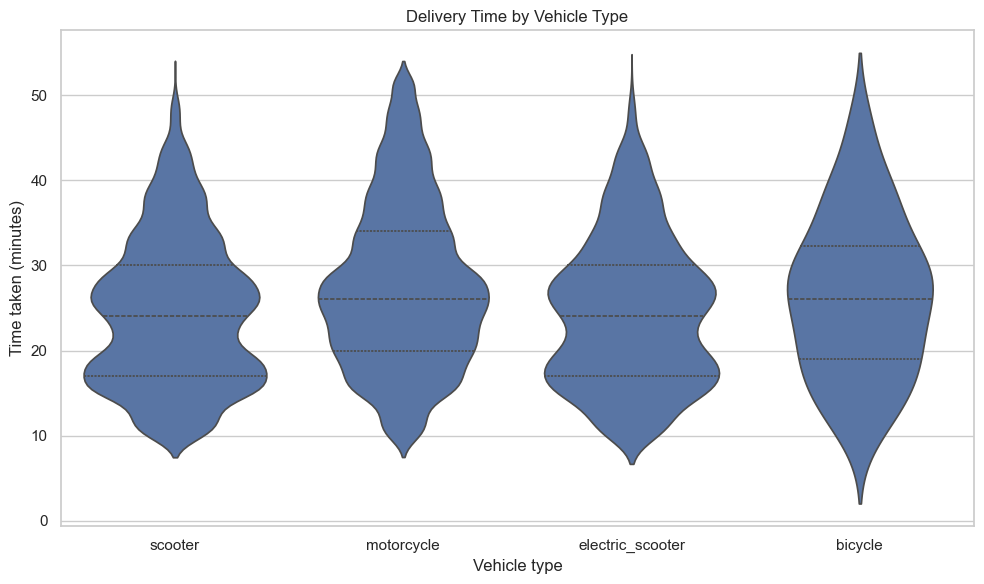

Saved violin plot to delivery_time_by_vehicle.png


In [31]:
# --- Vehicle type comparison ---------------------------------------------------
fig, ax = plt.subplots()
sns.violinplot(data=df, x='Type_of_vehicle', y='Time_taken (min)', inner='quartile', ax=ax)
ax.set_title('Delivery Time by Vehicle Type')
ax.set_xlabel('Vehicle type')
ax.set_ylabel('Time taken (minutes)')
fig.tight_layout()
fig.savefig(assets_dir / 'delivery_time_by_vehicle.png', dpi=150)
plt.show()
plt.close(fig)
print('Saved violin plot to delivery_time_by_vehicle.png')

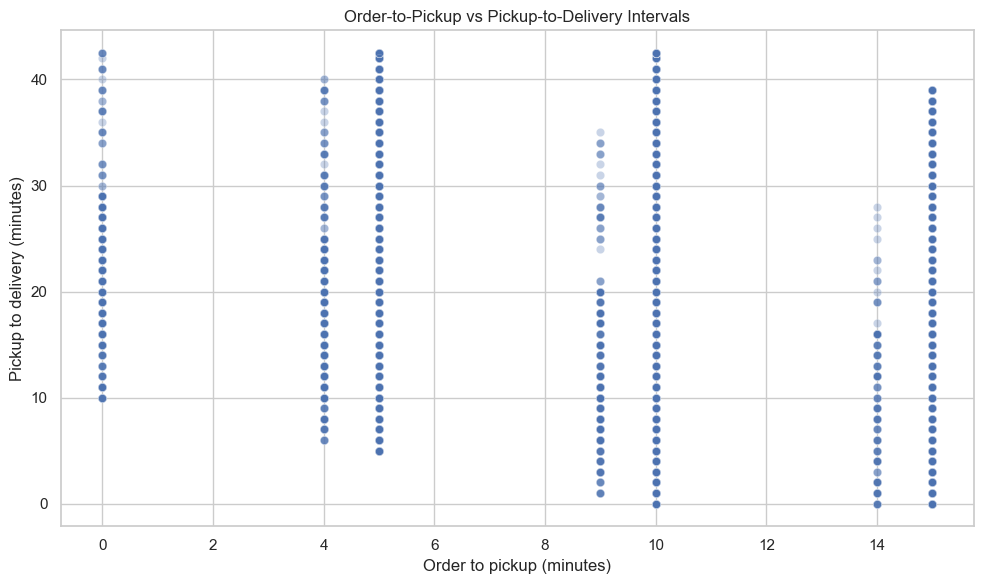

Saved scatter plot to interval_relationship_scatter.png


In [32]:
# --- Relationship between interval components ---------------------------------
valid_intervals = df.dropna(subset=['order_to_pick_minutes', 'pickup_to_delivery_minutes'])
fig, ax = plt.subplots()
sns.scatterplot(data=valid_intervals, x='order_to_pick_minutes', y='pickup_to_delivery_minutes',
                alpha=0.3, ax=ax)
ax.set_title('Order-to-Pickup vs Pickup-to-Delivery Intervals')
ax.set_xlabel('Order to pickup (minutes)')
ax.set_ylabel('Pickup to delivery (minutes)')
fig.tight_layout()
fig.savefig(assets_dir / 'interval_relationship_scatter.png', dpi=150)
plt.show()
plt.close(fig)
print('Saved scatter plot to interval_relationship_scatter.png')

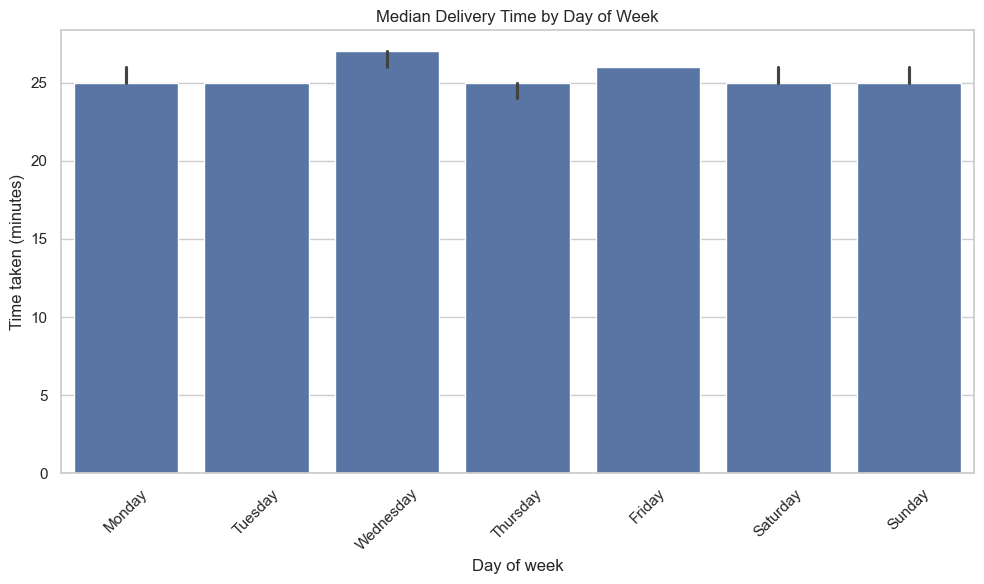

Saved bar chart to delivery_time_by_dow.png


In [33]:
# --- Weekly pattern for delivery time -----------------------------------------
df['Order_dow'] = pd.to_datetime(df['Order_Date_clean']).dt.day_name()
fig, ax = plt.subplots()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df, x='Order_dow', y='Time_taken (min)', order=order,
            estimator='median', ax=ax)
ax.set_title('Median Delivery Time by Day of Week')
ax.set_xlabel('Day of week')
ax.set_ylabel('Time taken (minutes)')
plt.xticks(rotation=45)
fig.tight_layout()
fig.savefig(assets_dir / 'delivery_time_by_dow.png', dpi=150)
plt.show()
plt.close(fig)
print('Saved bar chart to delivery_time_by_dow.png')

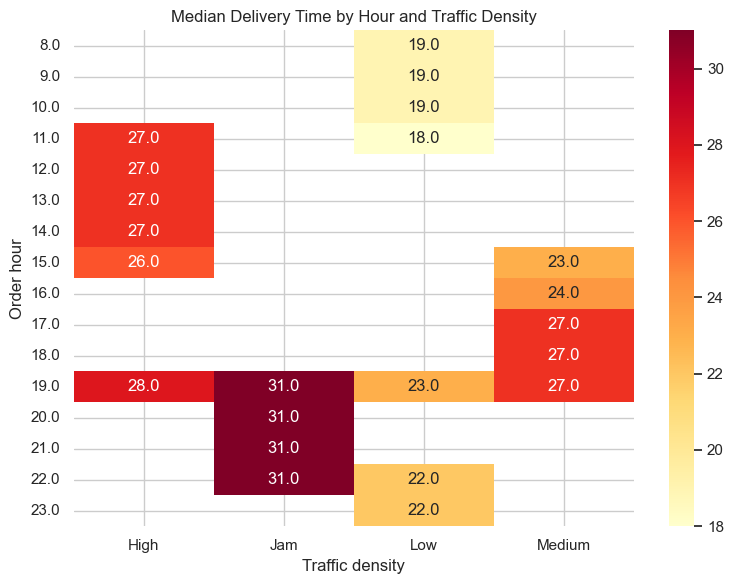

Saved heatmap to delivery_time_hour_traffic_heatmap.png


In [34]:
# --- Hourly profile split by traffic ------------------------------------------
df['Order_hour'] = df['Time_Orderd_minutes'] // 60
pivot = df.pivot_table(values='Time_taken (min)', index='Order_hour',
                       columns='Road_traffic_density', aggfunc='median')
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax)
ax.set_title('Median Delivery Time by Hour and Traffic Density')
ax.set_xlabel('Traffic density')
ax.set_ylabel('Order hour')
fig.tight_layout()
fig.savefig(assets_dir / 'delivery_time_hour_traffic_heatmap.png', dpi=150)
plt.show()
plt.close(fig)
print('Saved heatmap to delivery_time_hour_traffic_heatmap.png')

In [35]:
# --- Persist feature-augmented dataset ----------------------------------------
featured_path = Path('../data/processed/zomato_deliveries_featured.csv')
df.to_csv(featured_path, index=False)
print(f'Feature-augmented dataset saved to {featured_path.resolve()}')

Feature-augmented dataset saved to /Users/xiaohuan/develop/is5740-datapre/data/processed/zomato_deliveries_featured.csv


### Notes

- Saved figures live under `assets/plots/` for quick sharing.
- `haversine_km`, `Order_dow`, and `Order_hour` now persist in the featured dataset to feed modelling experiments.

count    45584.000000
mean        26.284815
std          9.358736
min         10.000000
10%         15.000000
25%         19.000000
50%         26.000000
75%         32.000000
90%         40.000000
max         51.500000
Name: Time_taken (min), dtype: float64


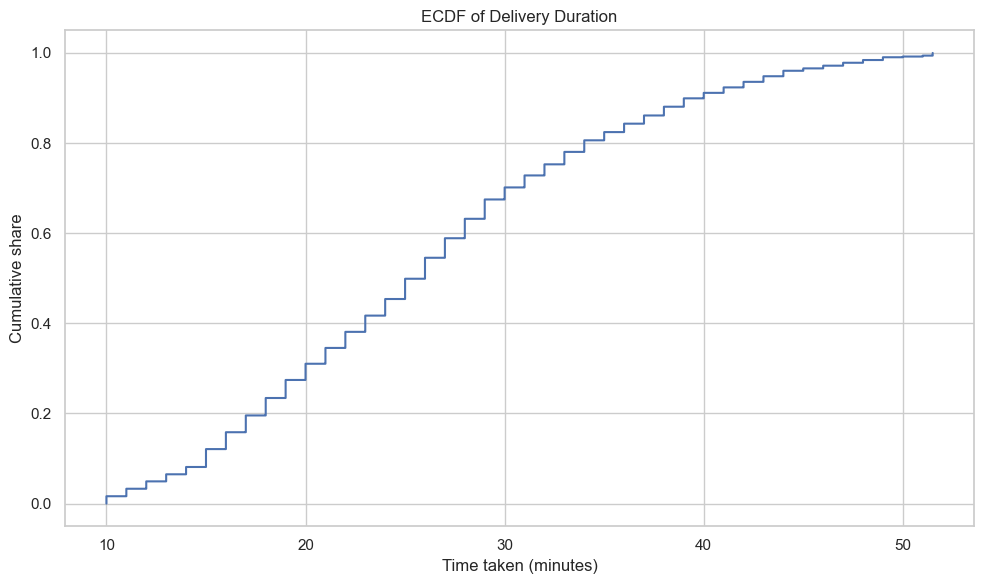

Saved ECDF to delivery_duration_ecdf.png


In [36]:
# --- 描述性统计与ECDF分布 ----------------------------------------------------
summary = df['Time_taken (min)'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
print(summary)

# ECDF
fig, ax = plt.subplots()
sorted_vals = np.sort(df['Time_taken (min)'].dropna().values)
y = np.linspace(0, 1, len(sorted_vals), endpoint=True)
ax.plot(sorted_vals, y, drawstyle='steps-post')
ax.set_title('ECDF of Delivery Duration')
ax.set_xlabel('Time taken (minutes)')
ax.set_ylabel('Cumulative share')
fig.tight_layout()
fig.savefig(assets_dir / 'delivery_duration_ecdf.png', dpi=150)
plt.show()
plt.close(fig)
print('Saved ECDF to delivery_duration_ecdf.png')


{'q1': np.float64(19.0), 'q3': np.float64(32.0), 'iqr': np.float64(13.0), 'lower': np.float64(-0.5), 'upper': np.float64(51.5)}
{'share_below': np.float64(0.0), 'share_above': np.float64(0.0)}


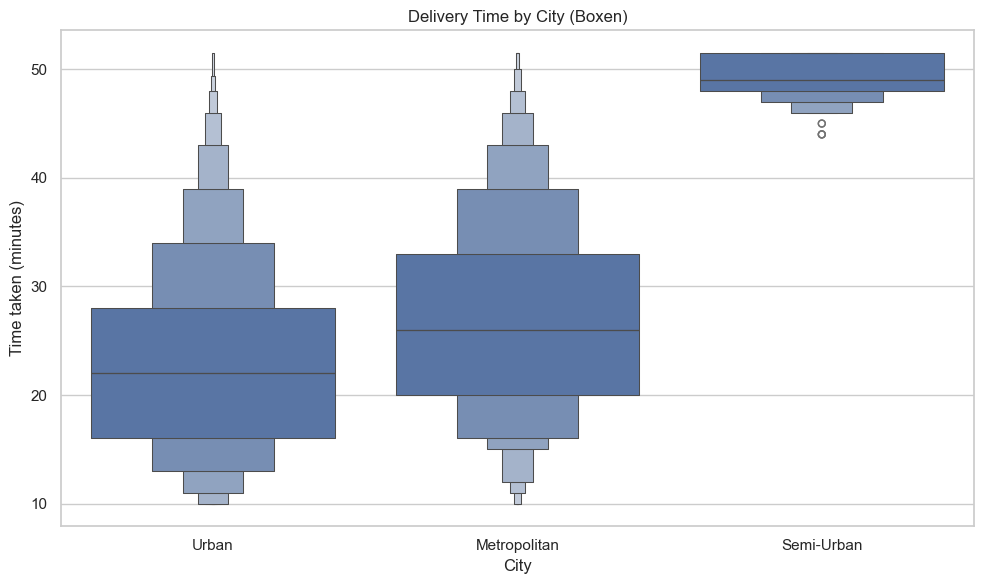

Saved boxen plot to delivery_time_boxen_by_city.png


In [37]:
# --- IQR异常值审计与按城市boxen图 --------------------------------------------
q1 = df['Time_taken (min)'].quantile(0.25)
q3 = df['Time_taken (min)'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print({'q1': q1, 'q3': q3, 'iqr': iqr, 'lower': lower, 'upper': upper})
share_below = (df['Time_taken (min)'] < lower).mean()
share_above = (df['Time_taken (min)'] > upper).mean()
print({'share_below': share_below, 'share_above': share_above})

fig, ax = plt.subplots()
sns.boxenplot(data=df, x='City', y='Time_taken (min)', ax=ax)
ax.set_title('Delivery Time by City (Boxen)')
ax.set_xlabel('City')
ax.set_ylabel('Time taken (minutes)')
fig.tight_layout()
fig.savefig(assets_dir / 'delivery_time_boxen_by_city.png', dpi=150)
plt.show()
plt.close(fig)
print('Saved boxen plot to delivery_time_boxen_by_city.png')
